# Juntar Datos Calidad Aire y Meteo

In [1]:
suppressMessages(library(saqgetr))
suppressMessages(library(ggplot2))

In [2]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [3]:
setwd("~/Repositories/AirQualityCOVID/")

source("src/Curation/general.R")

In [4]:
sites <- read.csv("data/Curation/AEMET/checked_sites_AEMET.csv",
                  stringsAsFactor=F)

In [5]:
site.lv <- levels(as.factor(sites$siteAQ))[1:2]
for (st in site.lv) {
    dataAQ <- read.csv(paste("data/Curation/AirQuality/Values/",
                             st, ".csv", sep=""), stringsAsFactor=F) %>%
                    data.as.datetime("date", "ymd_hms")
    dataAQ <- group.by.date(dataFrame=dataAQ,
                            valueList = list(value=dataAQ$value),
                            byList = list(date=dataAQ$date,
                                          site=dataAQ$site,
                                          variable=dataAQ$variable),
                            unit="day", FUN="mean"
                           ) %>% data.as.datetime("date", "ymd") %>%
                            pivot.long.table(valueCl = "value", variableCl="variable")
                    
    
    nameMto <- paste("data/Curation/AEMET/Values/",
                    sites[sites$siteAQ == st, "indicativo"],
                    ".csv", sep="")
    
    if (file.exists(nameMto)) {
        dataMto <- read.csv(nameMto, stringsAsFactor=F) %>%
                    data.as.datetime("fecha", "ymd")
    }
    
}

In [6]:
data.all <- merge(dataAQ, dataMto,
                  by.x="date", by.y="fecha",
                  all = T
                 )

Warning message:
"Removed 365 row(s) containing missing values (geom_path)."
Warning message:
"Removed 45 row(s) containing missing values (geom_path)."


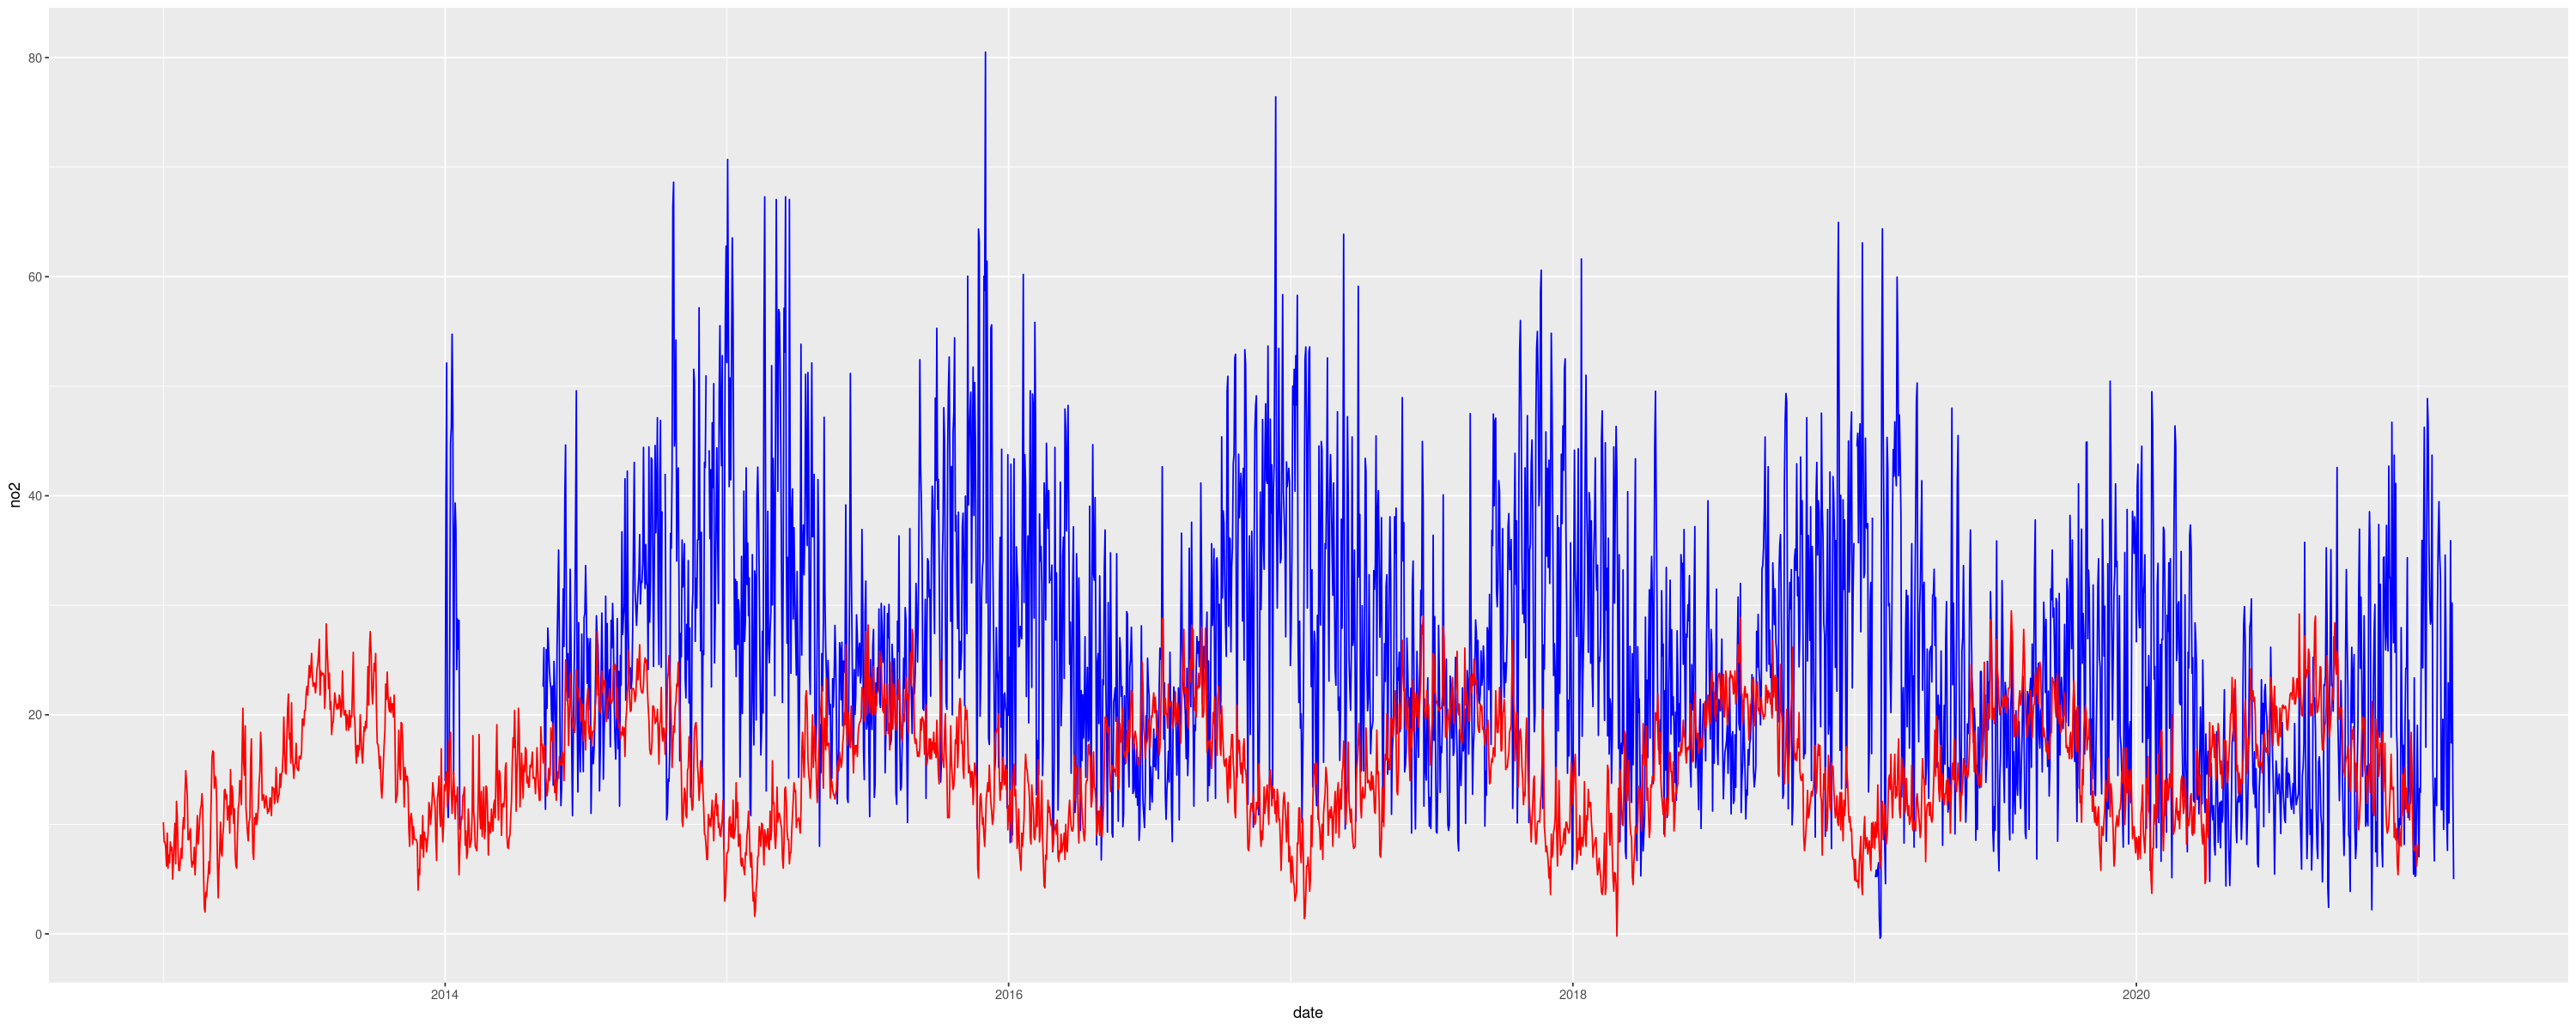

In [10]:
ggplot(data=data.all, aes(x=date)) +
    geom_line(aes(y=no2), color="blue") +
    geom_line(aes(y=tmed), color="red")